In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [118]:
df = pd.read_csv('train (4).csv')

In [119]:
# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify that there are no missing values left
print(df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [120]:
# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


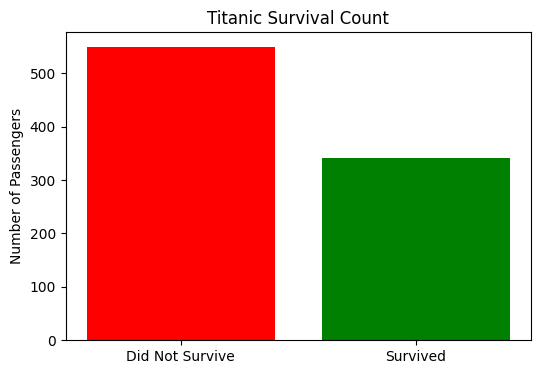

In [121]:
# Calculate survival counts
survival_counts = df['Survived'].value_counts()

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['Did Not Survive', 'Survived'], survival_counts, color=['red', 'green'])
plt.title('Titanic Survival Count')
plt.ylabel('Number of Passengers')
plt.show()


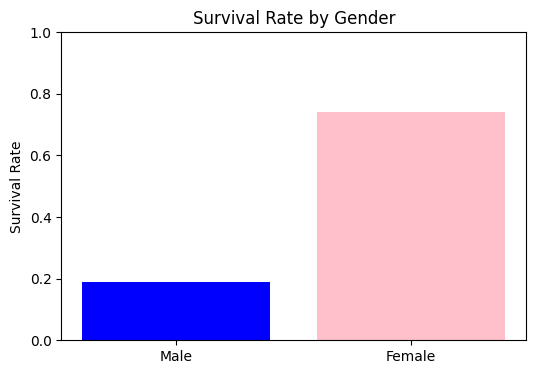

In [122]:
# Group by 'Sex' and 'Survived'
gender_survival = df.groupby('Sex')['Survived'].mean()

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['Male', 'Female'], gender_survival, color=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()


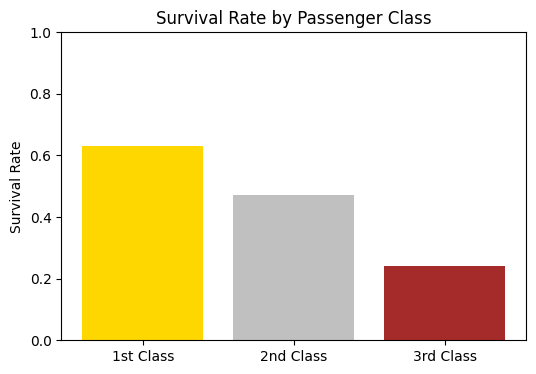

In [123]:
# Group by 'Pclass' and 'Survived'
class_survival = df.groupby('Pclass')['Survived'].mean()

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['1st Class', '2nd Class', '3rd Class'], class_survival, color=['gold', 'silver', 'brown'])
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()


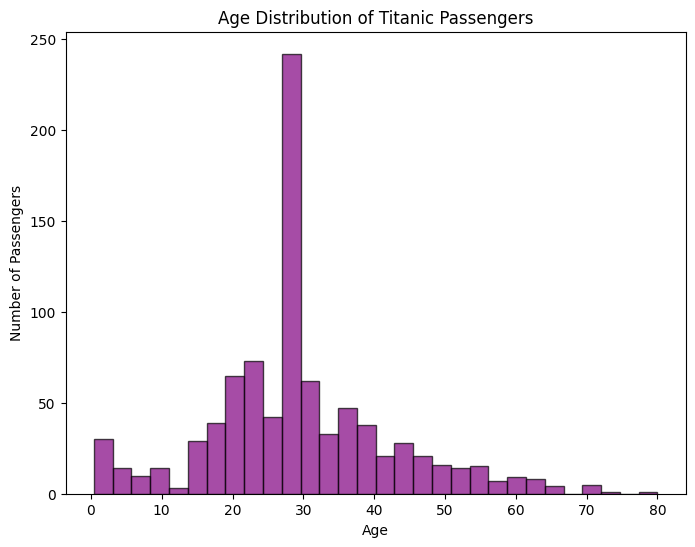

In [124]:
# Plotting Age Distribution
plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


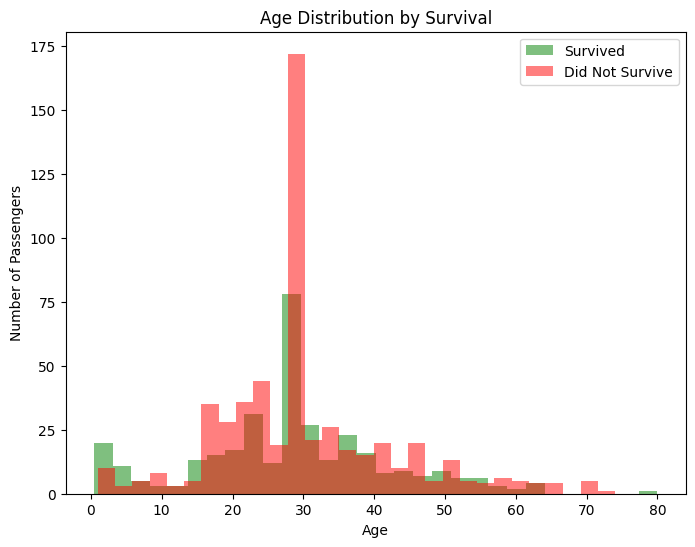

In [125]:
# Separate data into survived and not survived
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Plotting
plt.figure(figsize=(8,6))
plt.hist(survived['Age'], bins=30, alpha=0.5, label='Survived', color='green')
plt.hist(not_survived['Age'], bins=30, alpha=0.5, label='Did Not Survive', color='red')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


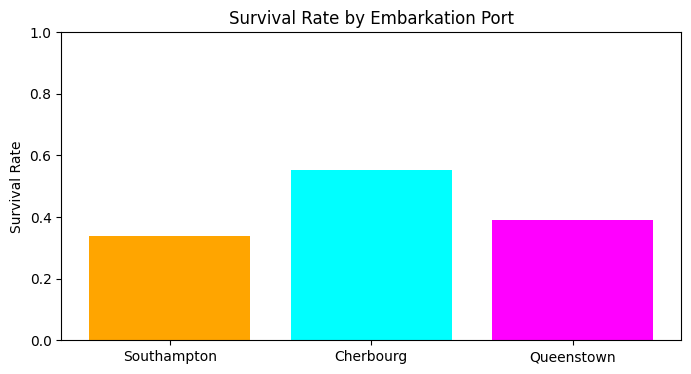

In [126]:
# Group by 'Embarked' and 'Survived'
embarked_survival = df.groupby('Embarked')['Survived'].mean()

# Mapping numerical 'Embarked' back to labels
embarked_survival.index = ['Southampton', 'Cherbourg', 'Queenstown']

# Plotting
plt.figure(figsize=(8,4))
plt.bar(embarked_survival.index, embarked_survival, color=['orange', 'cyan', 'magenta'])
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
plt.show()


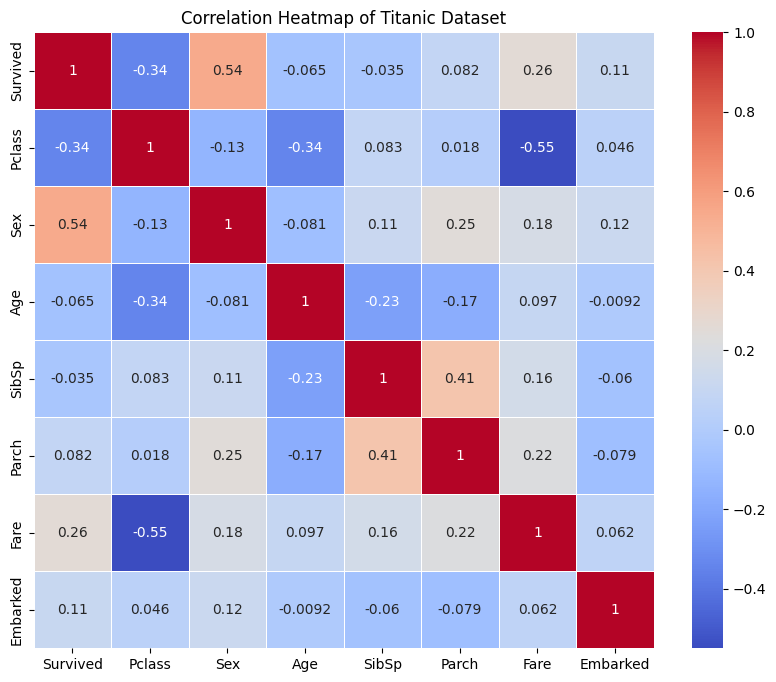

In [127]:
# Compute correlation matrix
corr = df.corr()

# Plotting Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()


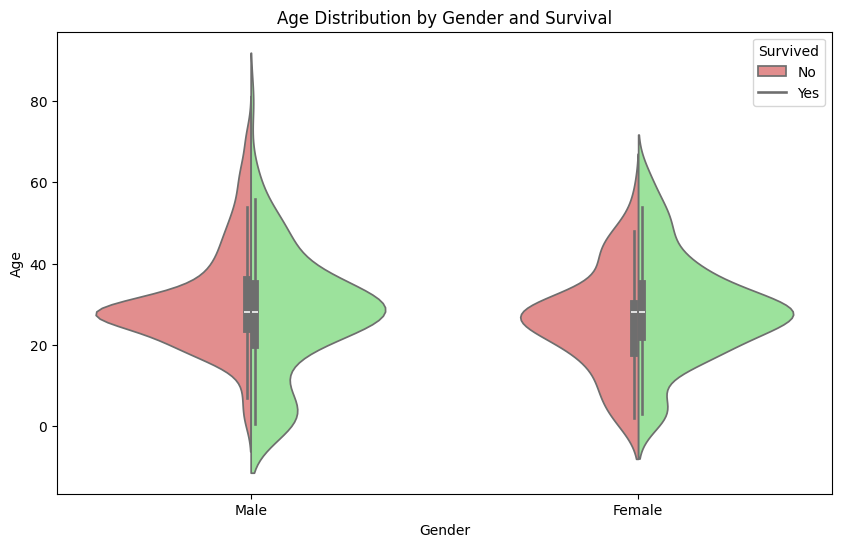

In [155]:
# Convert 'Sex' back to categorical labels for better readability
df['Sex_cat'] = df['Sex'].map({0: 'Male', 1: 'Female'})

# Plotting
plt.figure(figsize=(10,6))
sns.violinplot(x='Sex_cat', y='Age', hue='Survived', data=df, split=True, palette={0:'lightcoral', 1:'lightgreen'})
plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


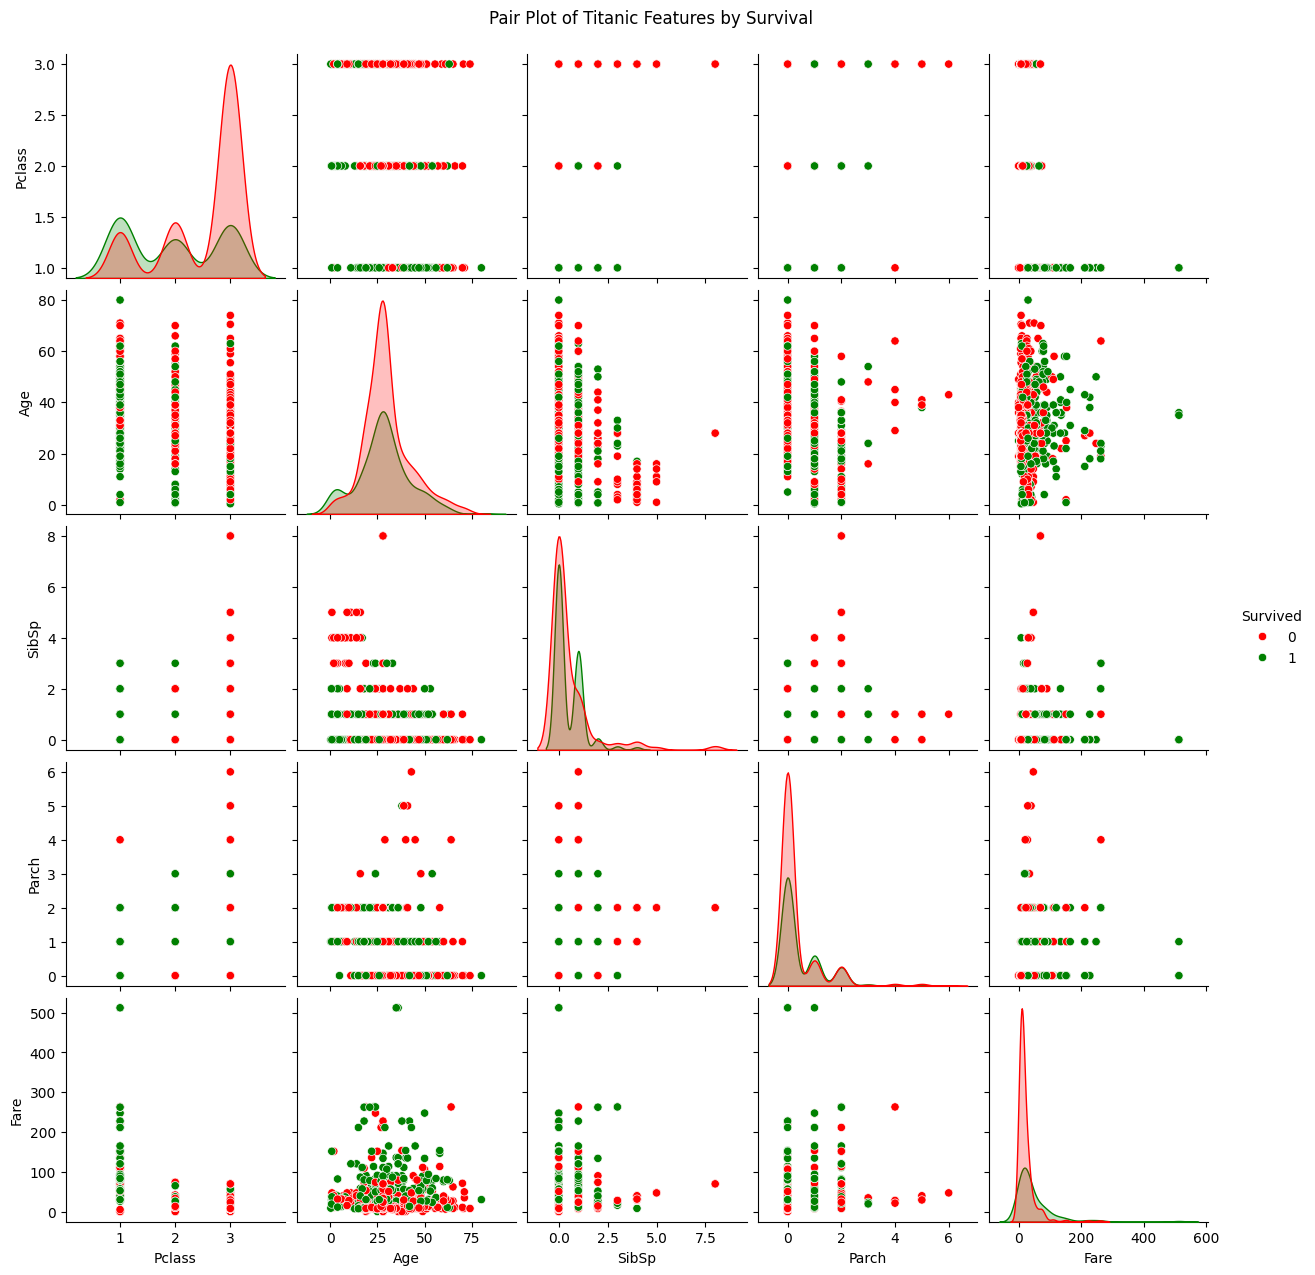

In [129]:
# Selecting relevant features
sns.pairplot(df[['Survived', 'Pclass', 'Sex_cat', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', palette={0:'red', 1:'green'}, diag_kind='kde')
plt.suptitle('Pair Plot of Titanic Features by Survival', y=1.02)
plt.show()

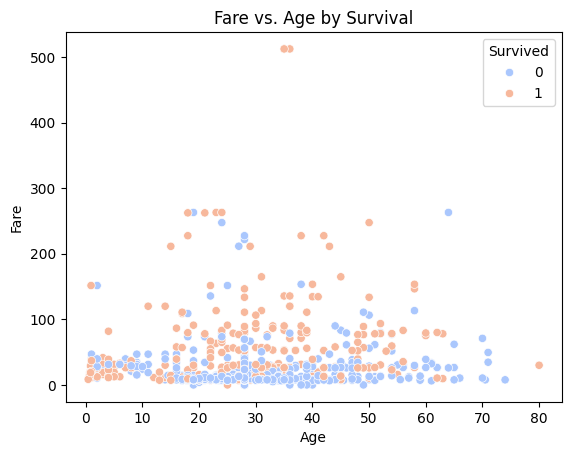

In [130]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Fare vs. Age by Survival')
plt.show()

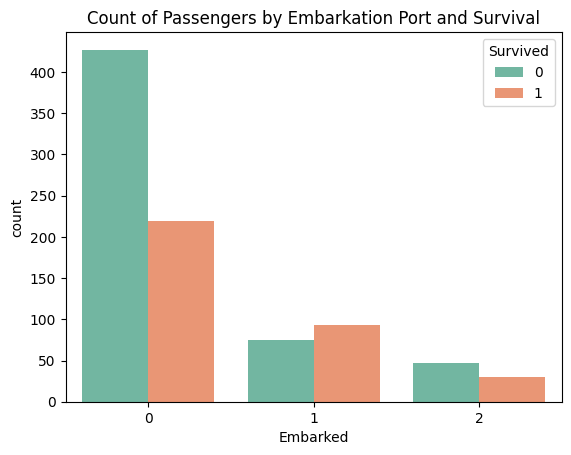

In [131]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set2')
plt.title('Count of Passengers by Embarkation Port and Survival')
plt.show()


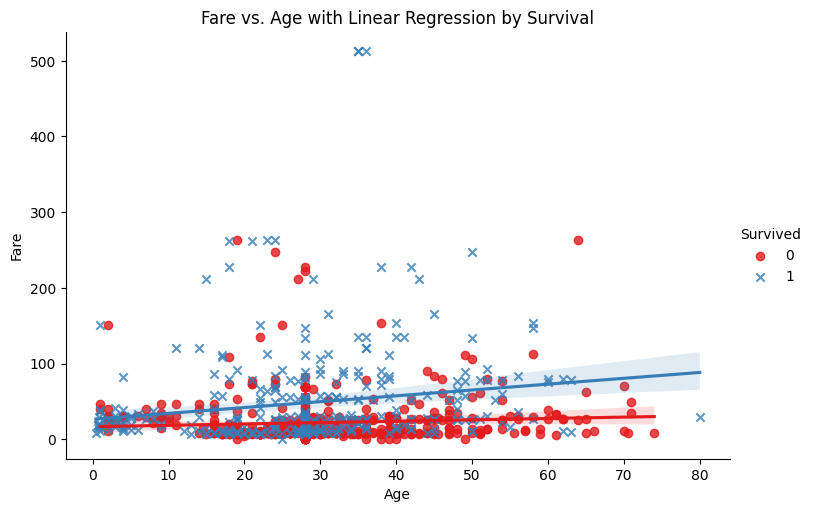

In [132]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df, aspect=1.5, markers=['o', 'x'], palette='Set1')
plt.title('Fare vs. Age with Linear Regression by Survival')
plt.show()


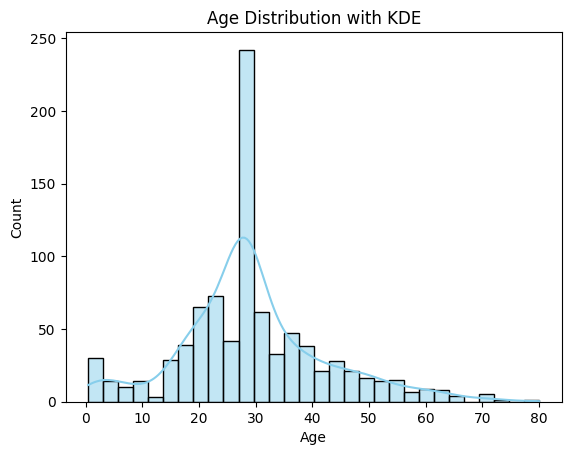

In [153]:
# Using histplot
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution with KDE') #Kernel Density Estimation
plt.show()


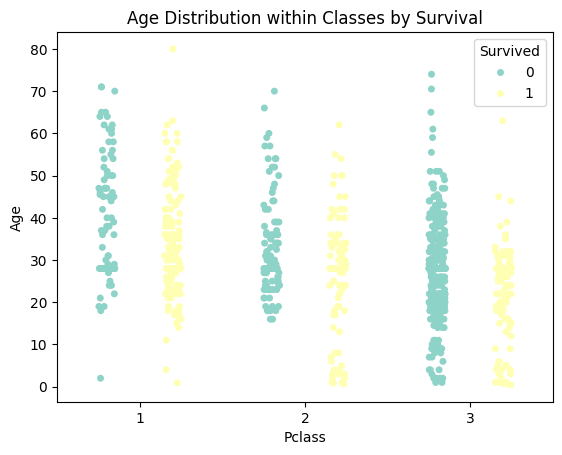

In [134]:
sns.stripplot(x='Pclass', y='Age', hue='Survived', data=df, jitter=True, dodge=True, palette='Set3')
plt.title('Age Distribution within Classes by Survival')
plt.show()